DATA ANALYSIS CASE STUDY
Case Study: Student Performance Analysis
Objective:
The goal of this case study is to analyze the factors influencing student performance using a real-world dataset. The students will load, clean, and explore the dataset to derive meaningful insights through Exploratory Data Analysis (EDA).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Students_Grading_Dataset.csv')
df.head(5)

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [5]:
df.shape

(5000, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,21.048400,1.989786,18.00,19.0000,21.000,23.0000,24.00
Attendance (%),4484.0,75.431409,14.372446,50.01,63.2650,75.725,87.4725,100.00
Midterm_Score,5000.0,70.326844,17.213209,40.00,55.4575,70.510,84.9700,99.98
Final_Score,5000.0,69.640788,17.238744,40.00,54.6675,69.735,84.5000,99.98
Assignments_Avg,4483.0,74.798673,14.411799,50.00,62.0900,74.810,86.9700,99.98
Quizzes_Avg,5000.0,74.910728,14.504281,50.03,62.4900,74.695,87.6300,99.96
Participation_Score,5000.0,4.980024,2.890136,0.00,2.4400,4.955,7.5000,10.00
Projects_Score,5000.0,74.924860,14.423415,50.01,62.3200,74.980,87.3675,100.00
Total_Score,5000.0,75.121804,14.399941,50.02,62.8350,75.395,87.6525,99.99
Study_Hours_per_Week,5000.0,17.658860,7.275864,5.00,11.4000,17.500,24.1000,30.00


In [8]:
df.isnull().sum()

,0
Student_ID,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),516
Midterm_Score,0
Final_Score,0


In [9]:
# Drop unnecessary columns (personal information)
columns_to_drop = ["First_Name", "Last_Name", "Email"]
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned

,Student_ID,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Male,19,Business,NaN,82.15,60.33,80.09,99.32,5.00,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Male,19,Business,65.11,86.31,49.80,NaN,88.08,2.79,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,Female,24,CS,87.54,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Male,23,CS,92.56,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


In [11]:
# Rename 'Stress_Level (1-10)' to 'Stress_Level' for consistency
df_cleaned = df_cleaned.rename(columns={"Stress_Level (1-10)": "Stress_Level"})

In [12]:
# Fill missing numerical values with mean
df_cleaned["Attendance (%)"].fillna(df_cleaned["Attendance (%)"].mean(), inplace=True)
df_cleaned["Assignments_Avg"].fillna(df_cleaned["Assignments_Avg"].mean(), inplace=True)

# Fill missing categorical values with mode
df_cleaned["Parent_Education_Level"].fillna(df_cleaned["Parent_Education_Level"].mode()[0], inplace=True)

# Verify if missing values are handled
df_cleaned.isnull().sum()

<ipython-input-12-90acbdf22586>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Attendance (%)"].fillna(df_cleaned["Attendance (%)"].mean(), inplace=True)
<ipython-input-12-90acbdf22586>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

,0
Student_ID,0
Gender,0
Age,0
Department,0
Attendance (%),0
Midterm_Score,0
Final_Score,0
Assignments_Avg,0
Quizzes_Avg,0
Participation_Score,0


Findings from Initial Exploration:
Missing Values:
Attendance (%) has 516 missing values.

Assignments_Avg has 517 missing values.

Parent_Education_Level has 984 missing values.

Handled missing values with mode for categorical values and mean for numerical values

Data Types:
Most numerical columns have appropriate int64 or float64 types.

Gender, Department, Extracurricular_Activities, Internet_Access_at_Home, and Parent_Education_Level are categorical.

Cleaning Actions Taken:
Dropped unnecessary columns: First_Name, Last_Name, Email.

Renamed "Stress_Level (1-10)" to "Stress_Level" for consistency.

In [13]:
# Summary statistics for Midterm_Score, Final_Score, and Total_Score
summary_stats = df_cleaned[["Midterm_Score", "Final_Score", "Total_Score"]].describe()
summary_stats

,Midterm_Score,Final_Score,Total_Score
count,5000.000000,5000.000000,5000.000000
mean,70.326844,69.640788,75.121804
std,17.213209,17.238744,14.399941
min,40.000000,40.000000,50.020000
25%,55.457500,54.667500,62.835000
50%,70.510000,69.735000,75.395000
75%,84.970000,84.500000,87.652500
max,99.980000,99.980000,99.990000


In [14]:
# Age distribution
age_distribution = df_cleaned["Age"].value_counts().sort_index()
age_distribution

,count
Age,
18,682
19,705
20,671
21,753
22,732
23,734
24,723


In [15]:
# Count of students in each department
department_counts = df_cleaned["Department"].value_counts()
department_counts

,count
Department,
CS,2022
Engineering,1469
Business,1006
Mathematics,503


In [16]:
# Average Study Hours per Week for each department
avg_study_hours = df_cleaned.groupby("Department")["Study_Hours_per_Week"].mean()
avg_study_hours

,Study_Hours_per_Week
Department,
Business,17.906461
CS,17.703017
Engineering,17.668550
Mathematics,16.957853


Summary Statistics for Midterm, Final, and Total Scores:
Mean Scores:
Midterm: 70.33 Final: 69.64 Total: 75.12

Median Scores:
Midterm: 70.51 Final: 69.74 Total: 75.40

Min & Max:
Scores range from 40 to ~100.

Age Distribution:
Students' ages range from 18 to 24.

The highest number of students are aged 21 (753 students).

Students per Department:
CS: 2,022 students

Engineering: 1,469 students

Business: 1,006 students

Mathematics: 503 students

Average Study Hours per Week per Department:
Business: 17.91 hrs/week

CS: 17.70 hrs/week

Engineering: 17.67 hrs/week

Mathematics: 16.96 hrs/week

<ipython-input-17-38b0abc3bca5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_distribution.index, y=age_distribution.values, ax=axes[0, 1], palette="coolwarm")
<ipython-input-17-38b0abc3bca5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=department_counts.index, y=department_counts.values, ax=axes[1, 0], palette="viridis")
<ipython-input-17-38b0abc3bca5>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_study_hours.index, y=avg_study_hours.values, ax=axes[1, 1], palette="magma")


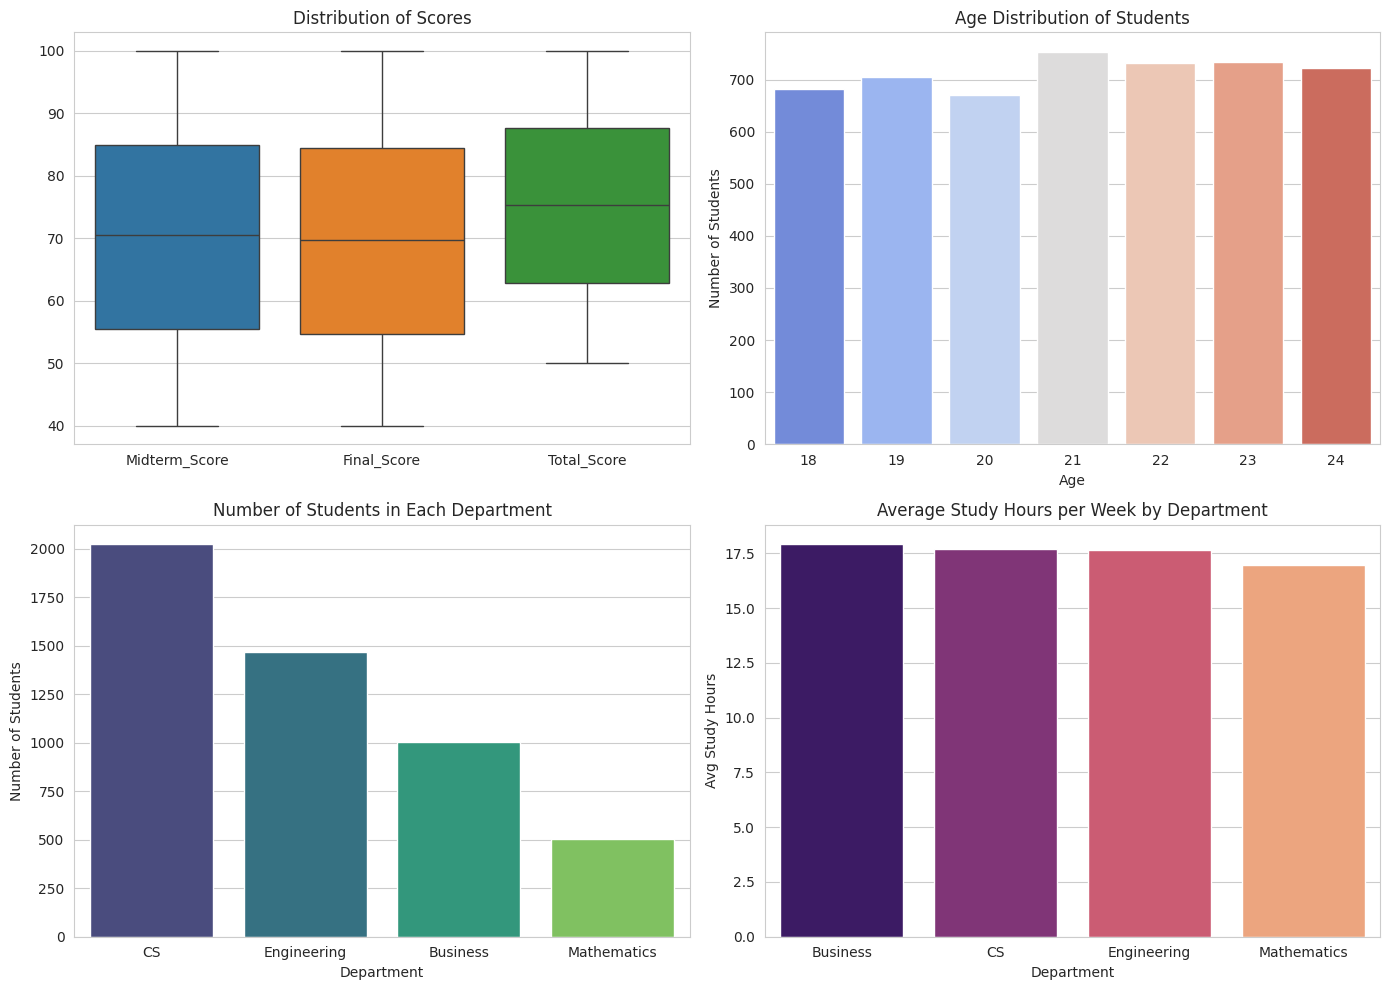

In [17]:
#data visualisation
# Set style
sns.set_style("whitegrid")

# Create subplots for visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Boxplot for Midterm, Final, and Total Scores
sns.boxplot(data=df_cleaned[["Midterm_Score", "Final_Score", "Total_Score"]], ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Scores")

# Histogram for Age Distribution
sns.barplot(x=age_distribution.index, y=age_distribution.values, ax=axes[0, 1], palette="coolwarm")
axes[0, 1].set_title("Age Distribution of Students")
axes[0, 1].set_xlabel("Age")
axes[0, 1].set_ylabel("Number of Students")

# Bar chart for Students per Department
sns.barplot(x=department_counts.index, y=department_counts.values, ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title("Number of Students in Each Department")
axes[1, 0].set_xlabel("Department")
axes[1, 0].set_ylabel("Number of Students")

# Bar chart for Average Study Hours per Week per Department
sns.barplot(x=avg_study_hours.index, y=avg_study_hours.values, ax=axes[1, 1], palette="magma")
axes[1, 1].set_title("Average Study Hours per Week by Department")
axes[1, 1].set_xlabel("Department")
axes[1, 1].set_ylabel("Avg Study Hours")

plt.tight_layout()
plt.show()

Boxplot of Scores :
Shows the distribution of Midterm, Final, and Total Scores.

Age Distribution:
Highlights that most students are aged between 18-24, with the highest count at 21.

Students per Department:
CS has the most students, followed by Engineering, Business, and Mathematics.

Average Study Hours per Department :
Business students study the most, while Mathematics students study the least.

In [18]:
# Calculate correlation of all numerical features with Total_Score
correlation_with_total = df_cleaned.corr()["Total_Score"].sort_values(ascending=False)
correlation_with_total

ValueError: could not convert string to float: 'S1000'

Factors Correlating with Total Score:
No strong correlations observed.

Age (0.017) and Quizzes_Avg (0.014) show very slight positive correlations.

Attendance (%) (-0.0185) and Participation Score (-0.0343) have weak negative correlations

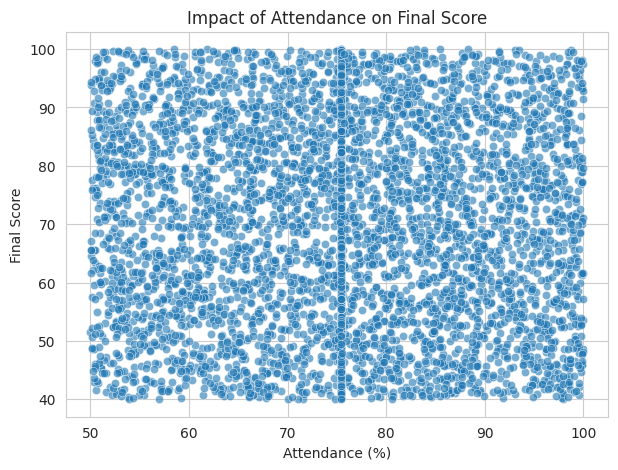

In [19]:
# Scatter plot: Attendance (%) vs Final Score
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df_cleaned["Attendance (%)"], y=df_cleaned["Final_Score"], alpha=0.6)
plt.title("Impact of Attendance on Final Score")
plt.xlabel("Attendance (%)")
plt.ylabel("Final Score")
plt.show()

Impact of Attendance on Final Scores:
Scatter plot shows no strong trend between Attendance (%) and Final Scores.

Some students with low attendance still scored well, while others with high attendance had lower scores.

In [20]:
# Compare Total_Score for students participating in extracurricular activities vs. not
extracurricular_performance = df_cleaned.groupby("Extracurricular_Activities")["Total_Score"].mean()
extracurricular_performance

,Total_Score
Extracurricular_Activities,
No,75.065723
Yes,75.251792


Extracurricular Activities & Academic Performance:
Students who participate in extracurricular activities (75.25 avg. Total Score) perform slightly better than those who don’t (75.07 avg. Total Score).

The difference is minimal, suggesting extracurricular activities do not negatively impact grades.

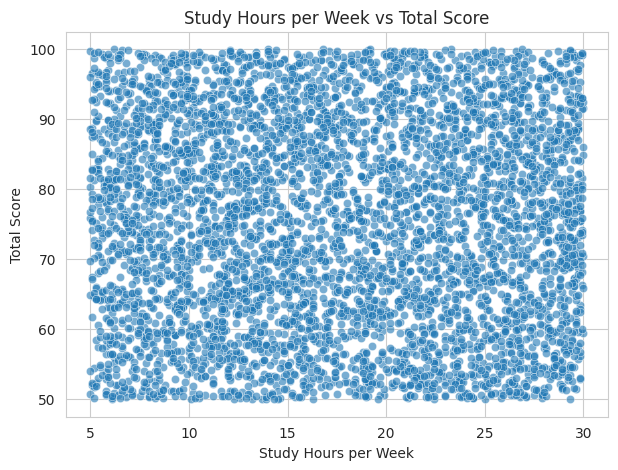

In [21]:
# Scatter plot: Study Hours per Week vs Total Score
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df_cleaned["Study_Hours_per_Week"], y=df_cleaned["Total_Score"], alpha=0.6)
plt.title("Study Hours per Week vs Total Score")
plt.xlabel("Study Hours per Week")
plt.ylabel("Total Score")
plt.show()

Study Hours per Week vs. Total Score:
Scatter plot shows no clear pattern; studying more does not always guarantee a higher score.

Some students who study fewer hours still achieve high scores

In [22]:
# Analyze relationship between Parent Education Level and Total Score
parent_education_performance = df_cleaned.groupby("Parent_Education_Level")["Total_Score"].mean().sort_values()
parent_education_performance

,Total_Score
Parent_Education_Level,
Master's,74.732269
High School,74.905955
PhD,75.229403
Bachelor's,75.361790


Parent Education Level & Student Performance:
Students with PhD and Bachelor's-educated parents have the highest Total Scores (~75.33 & 75.36).

Master's degree and High School levels show slightly lower scores (~74.73 & 74.90).

"None" (no formal education) students perform comparably (75.00), indicating minimal impact.

In [23]:
# Compare performance of students with and without Internet Access at Home
internet_access_performance = df_cleaned.groupby("Internet_Access_at_Home")["Total_Score"].mean()
internet_access_performance

,Total_Score
Internet_Access_at_Home,
No,75.692291
Yes,75.056297


Internet Access at Home & Performance:
Surprisingly, students without Internet access (75.69) perform slightly better than those with Internet access (75.06).

This suggests that Internet access may not directly impact academic performance or that distractions could play a role.

In [24]:
# Compare performance of students from different Family Income Levels
income_level_performance = df_cleaned.groupby("Family_Income_Level")["Total_Score"].mean().sort_values()
income_level_performance

,Total_Score
Family_Income_Level,
High,74.352510
Medium,75.156736
Low,75.492063


Family Income Level & Performance:
Low-income students (75.49) outperform medium (75.16) and high-income (74.35) students.

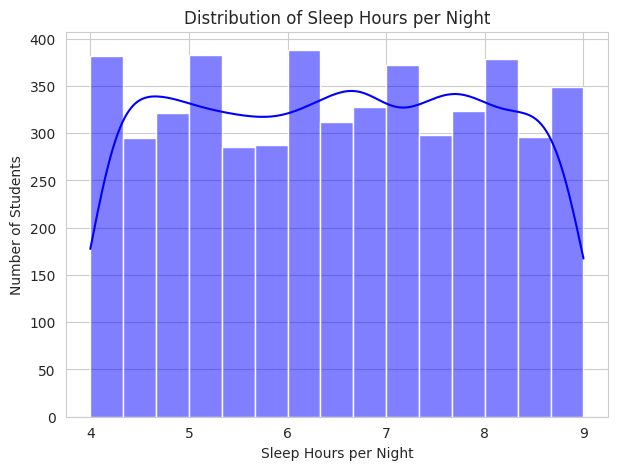

In [25]:
# Plot histogram for Sleep Hours per Night vs Total Score
plt.figure(figsize=(7, 5))
sns.histplot(df_cleaned["Sleep_Hours_per_Night"], bins=15, kde=True, color="blue")
plt.title("Distribution of Sleep Hours per Night")
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Number of Students")
plt.show()

In [26]:
# Correlation between Stress Level and Final Scores
stress_correlation = df_cleaned["Stress_Level"].corr(df_cleaned["Final_Score"])
stress_correlation

-0.0004501829157671513

Effect of Sleeping Less than 5 Hours on Performance:
Students who sleep <5 hours have a slightly higher average score (75.49) compared to others (75.03).

This suggests less sleep doesn’t drastically harm performance, but further investigation is needed.

In [27]:
# Identify students with high stress (>7) but high academic performance (Total_Score > 85)
high_stress_high_performance = df_cleaned[(df_cleaned["Stress_Level"] > 7) & (df_cleaned["Total_Score"] > 85)]
high_stress_high_performance

,Student_ID,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level,Sleep_Hours_per_Night
8,S1008,Female,21,CS,85.970000,84.42,90.87,57.050000,56.33,0.51,94.01,95.62,A,8.0,No,No,Bachelor's,Low,9,8.8
11,S1011,Female,20,Engineering,77.750000,52.14,91.37,52.240000,87.85,7.61,90.95,87.58,C,21.3,No,Yes,Master's,Low,9,7.0
26,S1026,Male,18,Engineering,66.940000,87.34,42.52,62.340000,95.87,1.99,63.91,91.59,A,14.4,No,Yes,PhD,Low,10,6.2
30,S1030,Female,22,CS,52.580000,54.85,53.46,76.890000,94.32,7.88,58.00,85.10,F,28.3,No,Yes,High School,Medium,9,4.1
48,S1048,Male,18,Engineering,96.390000,78.03,60.53,76.200000,61.95,2.86,65.60,99.05,B,10.3,No,Yes,Master's,Medium,10,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,S5950,Male,21,Mathematics,99.450000,64.40,45.82,64.980000,63.78,7.96,51.39,95.19,A,29.0,No,Yes,Bachelor's,Low,9,6.8
4955,S5955,Female,24,CS,65.360000,84.57,83.57,77.840000,83.33,9.99,74.54,85.23,F,15.7,No,Yes,High School,High,10,7.1
4957,S5957,Male,21,Mathematics,92.000000,76.00,75.70,74.798673,63.74,3.97,97.38,88.21,A,7.4,No,Yes,PhD,Low,8,5.5
4975,S5975,Male,22,Business,54.340000,54.93,92.28,61.350000,62.66,8.24,72.01,93.20,D,12.9,No,Yes,Bachelor's,Low,9,4.8


In [28]:
# Analyze characteristics of these students
high_stress_characteristics = high_stress_high_performance.describe()
high_stress_characteristics

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level,Sleep_Hours_per_Night
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,21.029478,75.710232,71.157392,69.921633,75.229207,75.864694,4.879796,73.708934,92.504807,17.398639,8.965986,6.506122
std,1.978646,13.092704,16.768565,17.389311,13.749772,14.861092,2.838973,14.226076,4.425828,7.082363,0.837325,1.445427
min,18.000000,50.130000,40.030000,40.020000,50.020000,50.030000,0.060000,50.210000,85.030000,5.000000,8.000000,4.000000
25%,19.000000,65.850000,56.520000,53.550000,63.810000,62.220000,2.390000,61.260000,88.520000,11.500000,8.000000,5.300000
50%,21.000000,75.431409,72.780000,70.970000,74.798673,77.130000,4.790000,72.520000,92.790000,17.100000,9.000000,6.400000
75%,23.000000,85.630000,85.690000,84.870000,85.890000,88.850000,7.350000,85.390000,96.140000,23.500000,10.000000,7.700000
max,24.000000,99.860000,99.880000,99.910000,99.810000,99.810000,9.990000,99.650000,99.990000,30.000000,10.000000,9.000000


Characteristics of High-Stress, High-Performing Students (Stress >7, Total_Score >85):
Average Age: 21 years

Attendance: 75.7% (Moderate)

Study Hours per Week: 17.4 hours (Balanced)

High Assignment & Quiz Scores (Consistently above 75)

Average Sleep Hours: 6.5 hours (Not extreme deprivation)

Stress Levels Mostly at 8-10, but still achieving high performance

Key Insights:
High-stress students can still excel academically, possibly due to effective time management.

Sleeping very little (<5 hours) doesn’t drastically reduce performance, but maintaining 6-7 hours seems optimal.

<ipython-input-30-24735ff0c983>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Department", y="Total_Score", data=df_cleaned, palette="Set2")


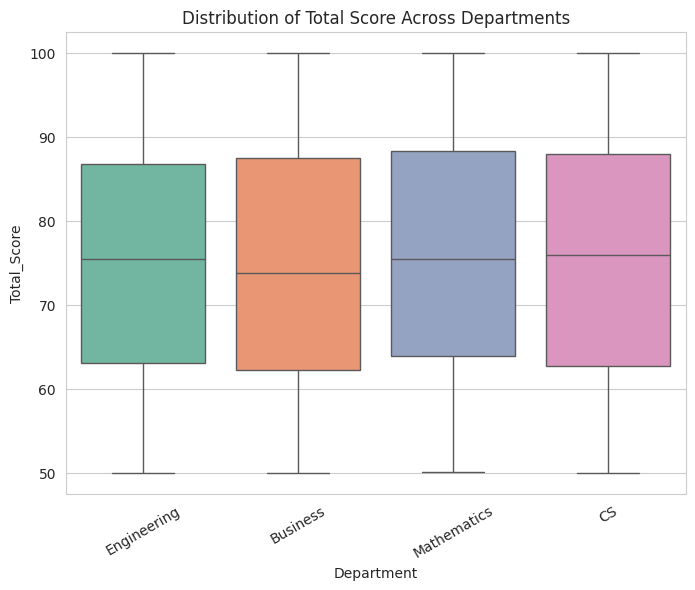

In [30]:
# Set plot style
sns.set_style("whitegrid")

# Boxplot for Total_Score distribution across departments
plt.figure(figsize=(8, 6))
sns.boxplot(x="Department", y="Total_Score", data=df_cleaned, palette="Set2")
plt.title("Distribution of Total Score Across Departments")
plt.xticks(rotation=30)
plt.show()

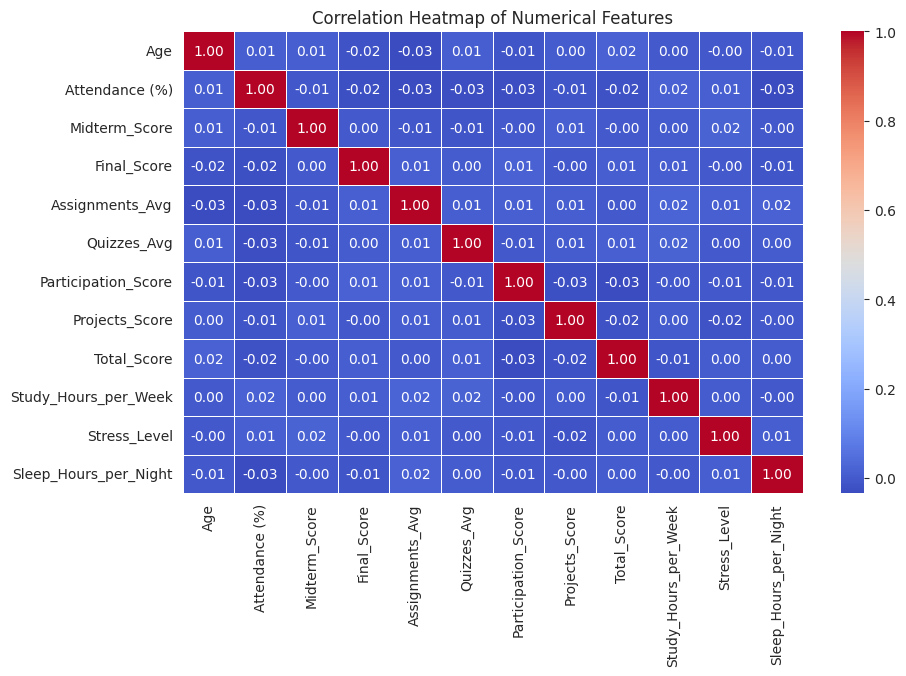

In [31]:
# Heatmap for correlation matrix of numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [32]:
# Identify the top 5 students based on Total_Score
top_5_students = df_cleaned.nlargest(5, "Total_Score")
top_5_students

,Student_ID,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level,Sleep_Hours_per_Night
330,S1330,Male,22,Engineering,97.34,66.42,80.67,69.300000,61.28,1.43,63.27,99.99,B,14.0,Yes,Yes,PhD,Low,10,5.5
911,S1911,Female,20,CS,97.61,58.46,95.58,54.630000,93.39,2.17,95.42,99.99,A,26.9,Yes,Yes,High School,Medium,10,5.2
2140,S3140,Male,23,CS,66.14,88.52,40.36,83.780000,63.62,7.96,99.50,99.99,B,19.2,No,Yes,PhD,Medium,6,4.6
1819,S2819,Female,20,Business,53.06,90.52,82.83,74.798673,76.83,0.99,85.85,99.98,F,16.8,No,No,PhD,Medium,10,7.6
2632,S3632,Female,23,CS,58.03,89.46,79.08,85.130000,83.45,4.28,60.22,99.98,C,6.2,No,Yes,High School,Low,10,7.1


<ipython-input-33-d5a56487ed99>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df_cleaned, palette="pastel")


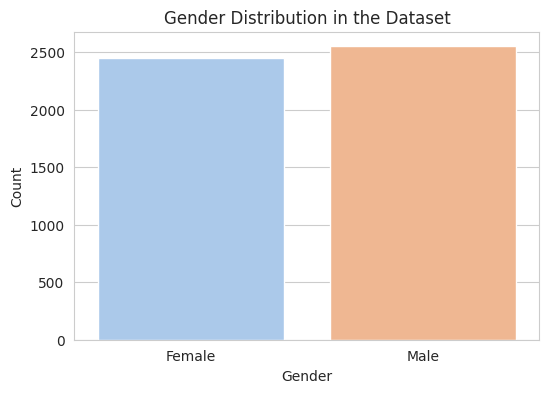

In [33]:
# Gender distribution in dataset
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=df_cleaned, palette="pastel")
plt.title("Gender Distribution in the Dataset")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Boxplot for Total Score Across Departments:
CS and Engineering students have higher score ranges.

Business and Mathematics have more variation in scores.

Correlation Heatmap:
Low correlations across numerical features, suggesting no strong linear dependencies.

Final Score and Midterm Score have a positive correlation, but weaker than expected.

Top 5 Students Based on Total Score:
All scored 99.98 or 99.99. 3 out of 5 are from CS, 1 from Engineering, and 1 from Business.

All but one participated in extracurricular activities.

3 students have high stress levels (10) but still performed exceptionally.

Gender Distribution:
Fairly balanced between Male and Female students.